**Import Libraries**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
np.random.seed(42)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV,
    learning_curve,
    train_test_split,
    cross_val_predict
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    classification_report,
     confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.decomposition import PCA  # 🔹 PCA import
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # If you're using oversampling
from imblearn.over_sampling import RandomOverSampler

from sklearn.neural_network import MLPClassifier  # or your model



**Load the data**

In [16]:


df = pd.read_csv('../data/Molecules_data.csv')
df = df.drop(df.columns[0], axis=1) # drop first column (identifier)
df.head()
df.info()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.5+ MB


,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.00000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,-0.032016,0.327044,-0.000701,-0.061154,1.018868,0.704031,-0.023251,-0.049010,1.609214,0.002133,...,23.222747,8.09434,13.417422,0.203552,1.229619,0.011494,1.471698,0.005184,-0.085793,0.060818
std,0.063713,0.775388,0.062758,0.072679,1.122112,1.678990,0.077983,0.101976,2.513948,0.074040,...,6.581596,4.42080,6.321318,0.024548,0.137841,0.005521,1.011399,0.046112,0.029645,0.247864
min,-0.311500,0.000000,-0.184600,-0.348500,0.000000,0.000000,-0.211900,-0.338700,-0.708700,-0.198700,...,0.000000,0.00000,0.000000,0.163600,0.811500,0.001400,0.000000,0.000000,-0.202700,0.000000
25%,-0.068500,0.000000,-0.035300,-0.099550,0.000000,0.000000,-0.066300,-0.115350,0.000000,-0.052350,...,19.045300,5.16470,8.020450,0.183800,1.142150,0.007750,1.000000,0.000000,-0.099700,0.000000
50%,-0.033400,0.000000,-0.002200,-0.060300,1.000000,0.000000,-0.037200,-0.042300,0.000000,-0.001800,...,23.180800,7.82760,13.342700,0.201900,1.234000,0.010700,1.000000,0.000000,-0.082500,0.000000
75%,0.005550,0.000000,0.027950,-0.016300,2.000000,0.000000,0.002650,0.014950,4.911250,0.056550,...,26.974500,10.54115,19.319450,0.220550,1.324150,0.014150,2.000000,0.000000,-0.066900,0.000000
max,0.108800,4.000000,0.218100,0.129000,6.000000,8.141400,0.249500,0.201000,7.740800,0.166300,...,41.380000,20.80540,27.879600,0.272100,1.548800,0.034600,5.000000,0.429200,-0.007300,2.636100


**Data Cleaning**

**Check missing values**

In [17]:
print(df.isnull().sum())#no missing values 

MATS3v             0
nHBint10           0
MATS3s             0
MATS3p             0
nHBDon_Lipinski    0
                  ..
nT5Ring            0
SHdNH              0
ETA_dEpsilon_C     0
MDEO-22            0
Class              0
Length: 1204, dtype: int64


**Encode categorical variables**

In [18]:
# class is the only categorical variable =>encode 
df['Class'] = df['Class'].map({'NonToxic': 0, 'Toxic': 1})

**spearate features and class column**

In [19]:
X=df.drop('Class',axis=1)
Y=df['Class']


**check for imbalance**

In [20]:
df['Class'].value_counts()# there is imbalance

Class
0    108
1     51
Name: count, dtype: int64

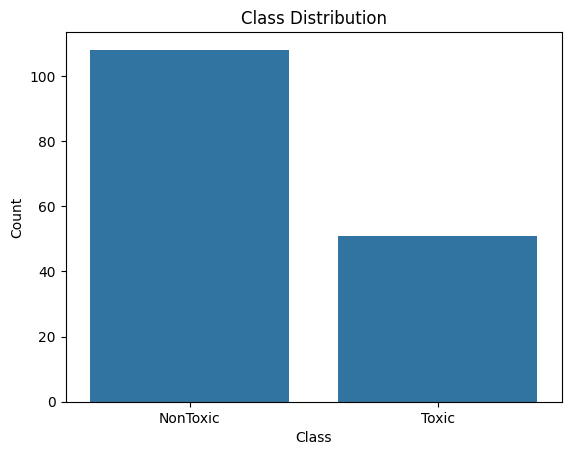

In [21]:
sns.countplot(x='Class', data=df)
plt.xticks([0, 1], ['NonToxic', 'Toxic'])  # replace 0/1 with labels
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



**Handle Imabalance**
**Since data is small and numeric we will experiment with random oversampling and smote** 

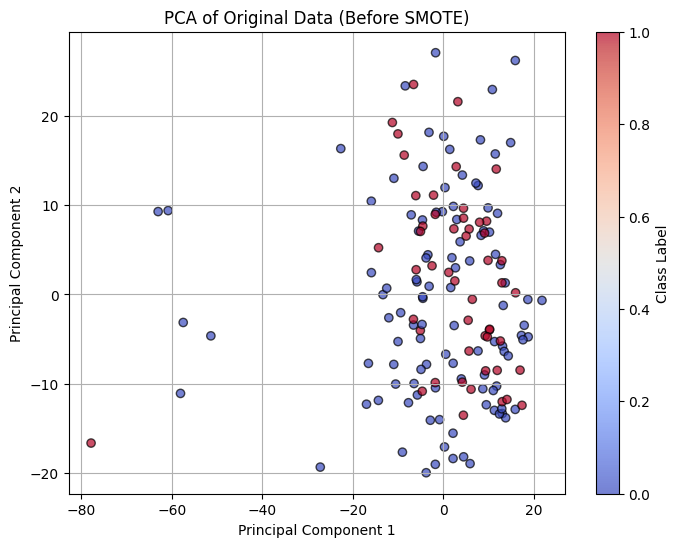

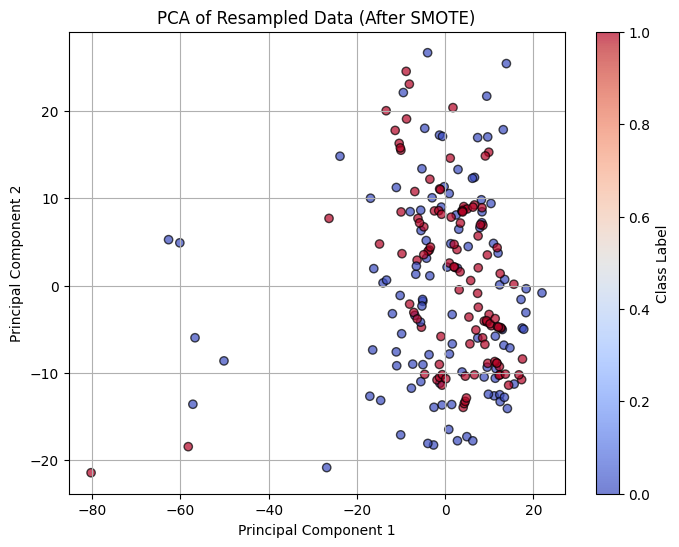

In [22]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA before SMOTE (just for visualization)
pca_original = PCA(n_components=2)
X_pca_original = pca_original.fit_transform(X_scaled)

#  Plot original data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_original[:, 0], X_pca_original[:, 1], c=Y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("PCA of Original Data (Before SMOTE)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()

#  Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, Y)

#  Apply PCA after SMOTE
pca_resampled = PCA(n_components=2)
X_pca_resampled = pca_resampled.fit_transform(X_resampled)

# Plot resampled data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_resampled[:, 0], X_pca_resampled[:, 1], c=y_resampled, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("PCA of Resampled Data (After SMOTE)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()


The results of PCA suggest that applying the SMOTE technique may not be beneficial for this dataset.In PCA  visualization  the synthetic  minority samples appear tightly clustered in some regions overlaping with majority class which can potentially blur the class boundaries and reduce the effectiveness of the classifier.

**Feature Selection using Random forest and  Split the data training and testing**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42)

rf.fit(X_scaled, Y)

# Get feature importances
importances = rf.feature_importances_

# Get top 10 feature indices
top_10_indices = np.argsort(importances)[-10:][::-1]

# Select top 10 features
X_top10 = X_scaled[:, top_10_indices]


X_train, X_test, y_train, y_test = train_test_split(
    X_top10, Y, test_size=0.2, stratify=Y, random_state=42
)


**Logistic Regression with random oversampling**

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- METRICS ---
Best Parameters: {'clf__penalty': 'l2', 'clf__C': 0.001}

Train Accuracy: 0.551
Validation Accuracy: 0.543
Test Accuracy: 0.562

Train F1 Score: 0.496
Validation F1 Score: 0.482
Test F1 Score: 0.462

Train ROC AUC: 0.616
Validation ROC AUC: 0.571
Test ROC AUC: 0.677
Test Precision-Recall AUC: 0.467

Classification Report (Test):

              precision    recall  f1-score   support

    NonToxic       0.75      0.55      0.63        22
       Toxic       0.38      0.60      0.46        10

    accuracy                           0.56        32
   macro avg       0.56      0.57      0.55        32
weighted avg       0.63      0.56      0.58        32



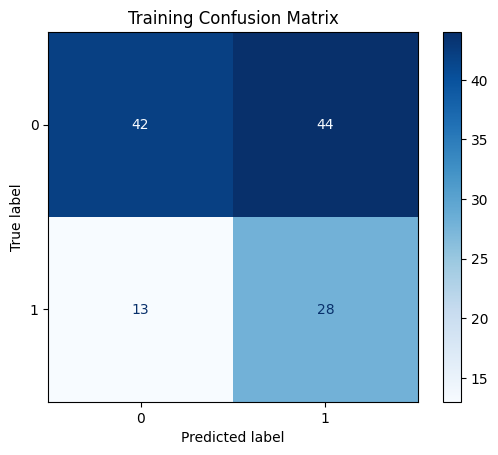

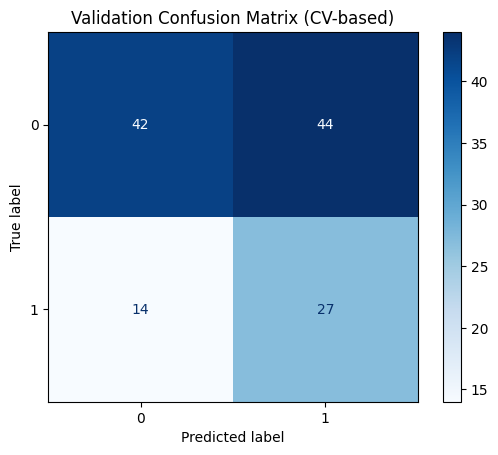

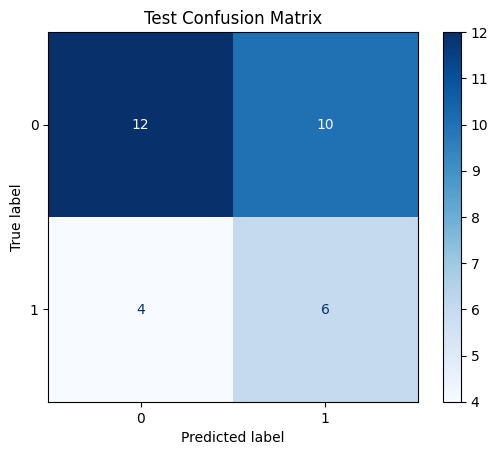

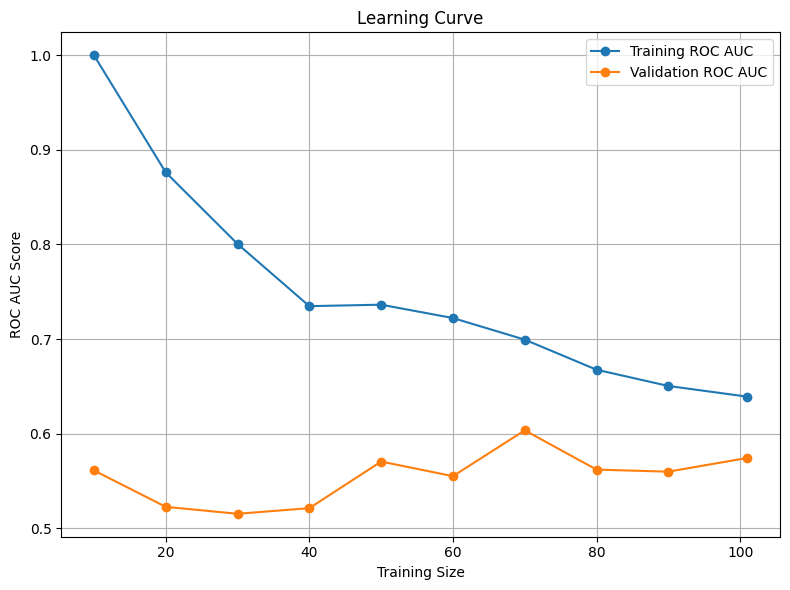

In [ ]:

pipeline = ImbPipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', max_iter=5000, random_state=42))
])


param_grid = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=15,
    scoring='f1',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


search.fit(X_train, y_train)


y_pred_train = search.best_estimator_.predict(X_train)
y_proba_train = search.best_estimator_.predict_proba(X_train)[:, 1]




y_pred_val = cross_val_predict(
    search.best_estimator_, X_train, y_train, cv=cv, method='predict'
)
y_proba_val = cross_val_predict(
    search.best_estimator_, X_train, y_train, cv=cv, method='predict_proba'
)[:, 1]


print("\n METRICS")
print("Best Parameters:", search.best_params_)

print(f"\nTrain Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_pred_val):.3f}")


print(f"\nTrain F1 Score: {f1_score(y_train, y_pred_train):.3f}")
print(f"Validation F1 Score: {f1_score(y_train, y_pred_val):.3f}")


print(f"\nTrain ROC AUC: {roc_auc_score(y_train, y_proba_train):.3f}")
print(f"Validation ROC AUC: {roc_auc_score(y_train, y_proba_val):.3f}")




def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

plot_conf_matrix(y_train, y_pred_train, "Training Confusion Matrix")
plot_conf_matrix(y_train, y_pred_val, "Validation Confusion Matrix (CV-based)")



def plot_learning_curve(estimator, X, y, scoring='roc_auc', cv=None, title='Learning Curve'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training ROC AUC')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation ROC AUC')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('ROC AUC Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curve
plot_learning_curve(search.best_estimator_, X_train, y_train, scoring='roc_auc', cv=cv)
